<a href="https://colab.research.google.com/github/afrojaakter/Pattern-Recognition/blob/main/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Compression

In [1]:
import os
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

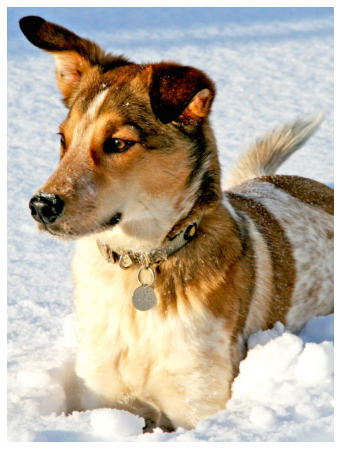

In [2]:
plt.rcParams['figure.figsize'] = [16,8]

#reading the image cat.jfif
A = imread(os.path.join('/content/drive/MyDrive/Data/dog.jpg'))

img = plt.imshow(A)
img.set_cmap('gray')
plt.axis('off')
plt.show()


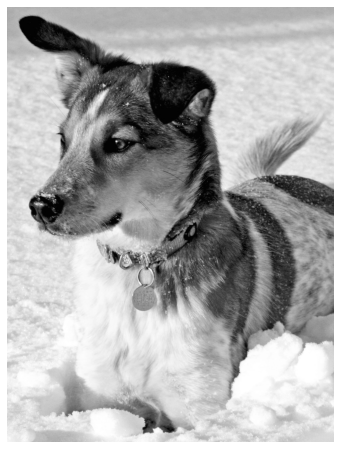

In [3]:
#Convert the RGB image to Grayscale
X = np.mean(A, -1)

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

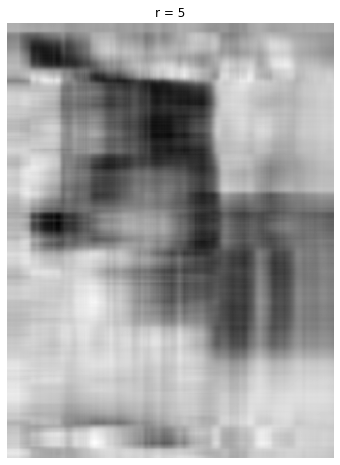

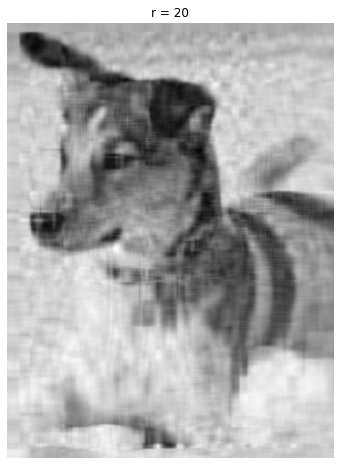

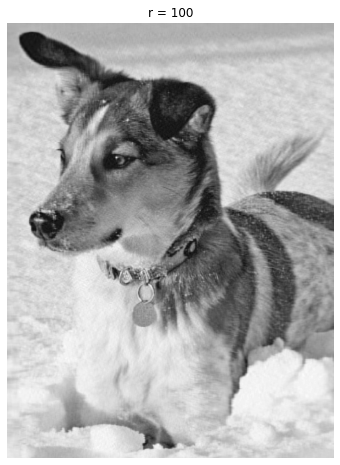

In [4]:
#SVD decomposition of X
U, S, VT = np.linalg.svd(X, full_matrices= True)
S = np.diag(S) # Writing S as diagonal matrix

j = 0
for r in (5, 20, 100):
  #Construct approximate image, X = USV* with r rank aprroximation
  Xapprox = U[:,:r] @ S[0:r, :r] @ VT[:r, :]
  plt.figure(j + 1)
  j+=1

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()

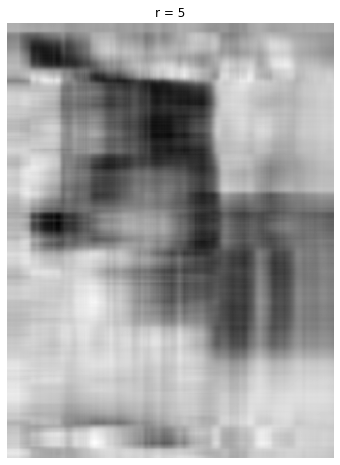

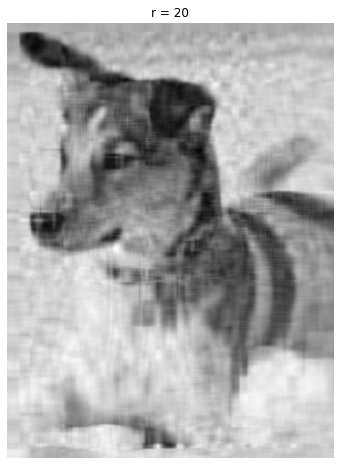

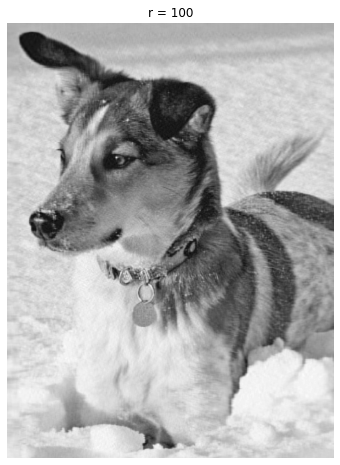

In [5]:
#Economy SVD decomposition of X
U, S, VT = np.linalg.svd(X, full_matrices= False)
S = np.diag(S) # Writing S as diagonal matrix

j = 0
for r in (5, 20, 100):
  #Construct approximate image, X = USV* with r rank aprroximationn
  Xapprox = U[:,:r] @ S[0:r, :r] @ VT[:r, :]
  plt.figure(j + 1)
  j+=1

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()


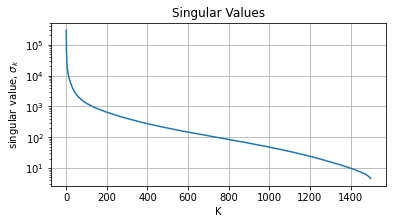

In [9]:
plt.rcParams['figure.figsize'] = [6,3]
#plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.xlabel('K')
plt.ylabel('singular value, $\sigma_k$')
plt.grid()

In [19]:
r = [5, 20, 100]
sigma = [np.diag(S)[0], np.diag(S)[20], np.diag(S)[100]]

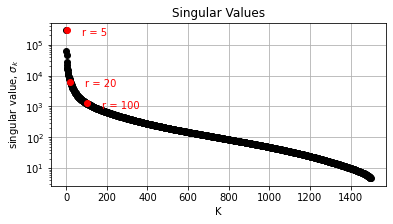

In [25]:


plt.rcParams['figure.figsize'] = [6,3]
plt.figure(1)
plt.semilogy(np.diag(S), 'ko')

plt.semilogy(r, sigma,'ro', label = 'r = 100')
for x,y in zip(r,sigma):

    label = "r = {:.0f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color = 'r',
                 textcoords="offset points", # how to position the text
                 xytext=(15,-5), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.title('Singular Values')
plt.xlabel('K')

plt.ylabel('singular value, $\sigma_k$')
#plt.legend()
plt.grid()

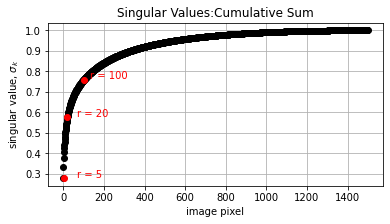

In [39]:
plt.rcParams['figure.figsize'] = [6,3]
cum_sigma = [(np.cumsum(np.diag(S))/np.sum(np.diag(S)))[0],
             (np.cumsum(np.diag(S))/np.sum(np.diag(S)))[20],
             (np.cumsum(np.diag(S))/np.sum(np.diag(S)))[100]]
plt.figure(1)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), 'ko')

plt.plot(r, cum_sigma,'ro', label = 'r = 100')
for x,y in zip(r,cum_sigma):

    label = "r = {:.0f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 color = 'r',
                 textcoords="offset points", # how to position the text
                 xytext=(25,1), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Singular Values')

plt.title('Singular Values:Cumulative Sum')
plt.xlabel('image pixel')
plt.ylabel('singular value, $\sigma_k$')
plt.grid()

plt.show()